# Correlation Analysis: Model Error vs. Feature Effect Error

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

## Model Results

In [1]:
config_file = "../../config_sim_simple_scenarios_20.ini"

In [2]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.utils import create_joined_melted_df
from feature_effect_empirical_analysis.plotting.plots import plot_correlation_analysis

In [3]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

In [4]:
model_results_storage = config.get("storage", "model_results")
df_model_res = pd.read_sql_table("model_results", f"sqlite:///..{model_results_storage}")
df_model_res.head()

,index,model_id,model,simulation,n_train,snr,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.026337,0.032812,0.104704,0.128978,0.983756,0.978263
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.018721,0.033992,0.074270,0.129277,0.988453,0.977481
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014808,0.016236,0.097228,0.101817,0.990867,0.989244
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014778,0.015819,0.096665,0.100422,0.990885,0.989520
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.013298,0.017009,0.091930,0.103994,0.991798,0.988732


## Feature Effect Results

In [5]:
feauture_effect_type = "pdp_results"

In [6]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.994344,1.413879,3.558854e-04,9.373975e-03
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,1.709604,3.355250,4.212022e-04,3.152384e-03
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.007321,0.018133,1.136923e-04,9.506642e-05
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.004619,0.004513,1.082148e-08,1.082148e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.027139,0.024859,8.144461e-04,2.079953e-03


## Correlation Analysis

In [7]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.026337,0.032812,0.104704,0.128978,0.983756,0.978263,x_1,0.994344
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.018721,0.033992,0.074270,0.129277,0.988453,0.977481,x_1,1.709604
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014808,0.016236,0.097228,0.101817,0.990867,0.989244,x_1,0.007321
3,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014778,0.015819,0.096665,0.100422,0.990885,0.989520,x_1,0.004619
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.013298,0.017009,0.091930,0.103994,0.991798,0.988732,x_1,0.027139


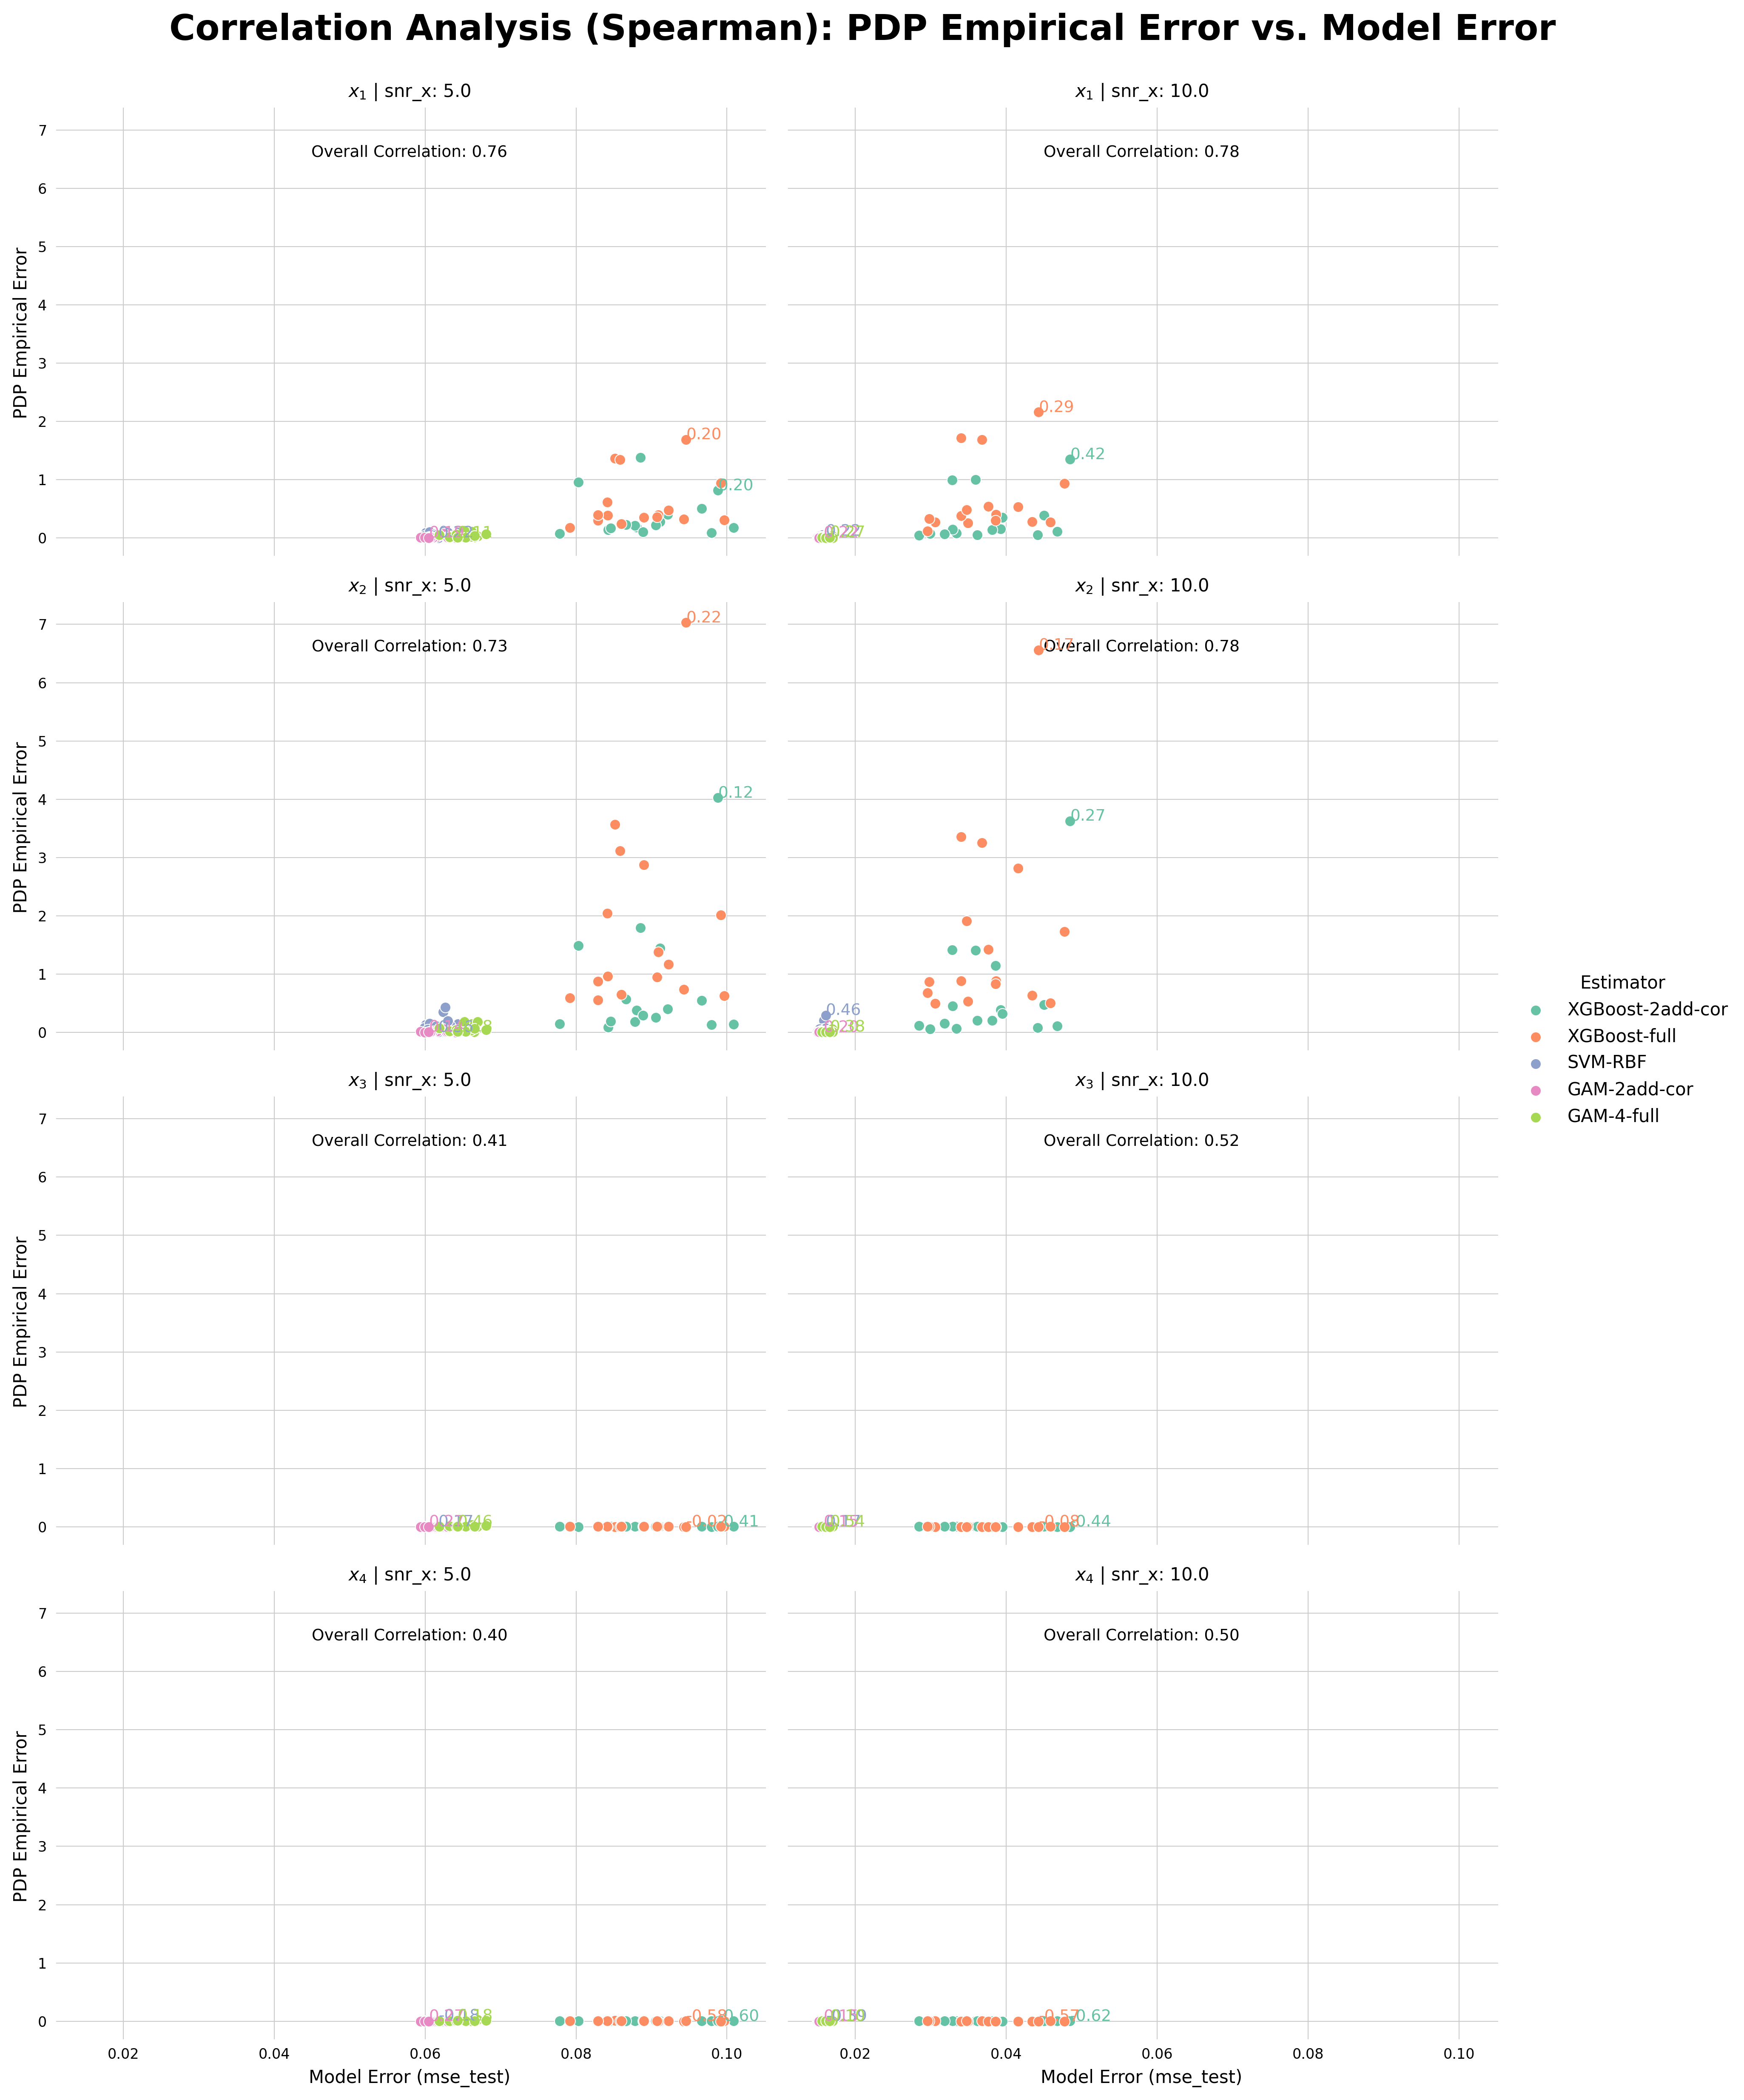

In [8]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="PDP Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [9]:
g;

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                        
x_1     5.0  Overall              0.758426
             XGBoost-2add-cor     0.197059
             XGBoost-full         0.202941
             SVM-RBF              0.217857
             GAM-2add-cor         0.185714
             GAM-4-full           0.107143
        10.0 Overall              0.783240
             XGBoost-2add-cor     0.420588
             XGBoost-full         0.288235
             SVM-RBF              0.217647
             GAM-2add-cor         0.223529
             GAM-4-full           0.270588
x_2     5.0  Overall              0.726274
             XGBoost-2add-cor     0.117647
             XGBoost-full         0.223529
             SVM-RBF              0.364286
             GAM-2add-cor         0.139286
             GAM-4-full           0.178571
        10.0 Overall              0.775176
             XGBoost-2add-cor     0.270588
             XGBoost-full         0.170588
             SVM-RBF              0.461765
             GAM-2add-cor         0.202941
             GAM-4-full           0.382353
x_3     5.0  Overall              0.408828
             XGBoost-2add-cor    -0.408824
             XGBoost-full        -0.020588
             SVM-RBF              0.171429
             GAM-2add-cor         0.271429
             GAM-4-full           0.464286
        10.0 Overall              0.523347
             XGBoost-2add-cor    -0.444118
             XGBoost-full        -0.082353
             SVM-RBF              0.167647
             GAM-2add-cor         0.150000
             GAM-4-full           0.535294
x_4     5.0  Overall              0.396419
             XGBoost-2add-cor    -0.602941
             XGBoost-full        -0.576471
             SVM-RBF             -0.182143
             GAM-2add-cor         0.271429
             GAM-4-full           0.178571
        10.0 Overall              0.495523
             XGBoost-2add-cor    -0.620588
             XGBoost-full        -0.567647
             SVM-RBF             -0.388235
             GAM-2add-cor         0.150000
             GAM-4-full           0.102941

## Feature Effect Results

In [11]:
feauture_effect_type = "ale_results"

In [12]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.093215,0.282560,0.001980,0.001340
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.070511,0.300384,0.000964,0.000726
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000556,0.002820,0.000033,0.000086
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.000668,0.000573,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000956,0.000616,0.000256,0.000410


## Correlation Analysis

In [13]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.026337,0.032812,0.104704,0.128978,0.983756,0.978263,x_1,0.093215
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.018721,0.033992,0.074270,0.129277,0.988453,0.977481,x_1,0.070511
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014808,0.016236,0.097228,0.101817,0.990867,0.989244,x_1,0.000556
3,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014778,0.015819,0.096665,0.100422,0.990885,0.989520,x_1,0.000668
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.013298,0.017009,0.091930,0.103994,0.991798,0.988732,x_1,0.000956


c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


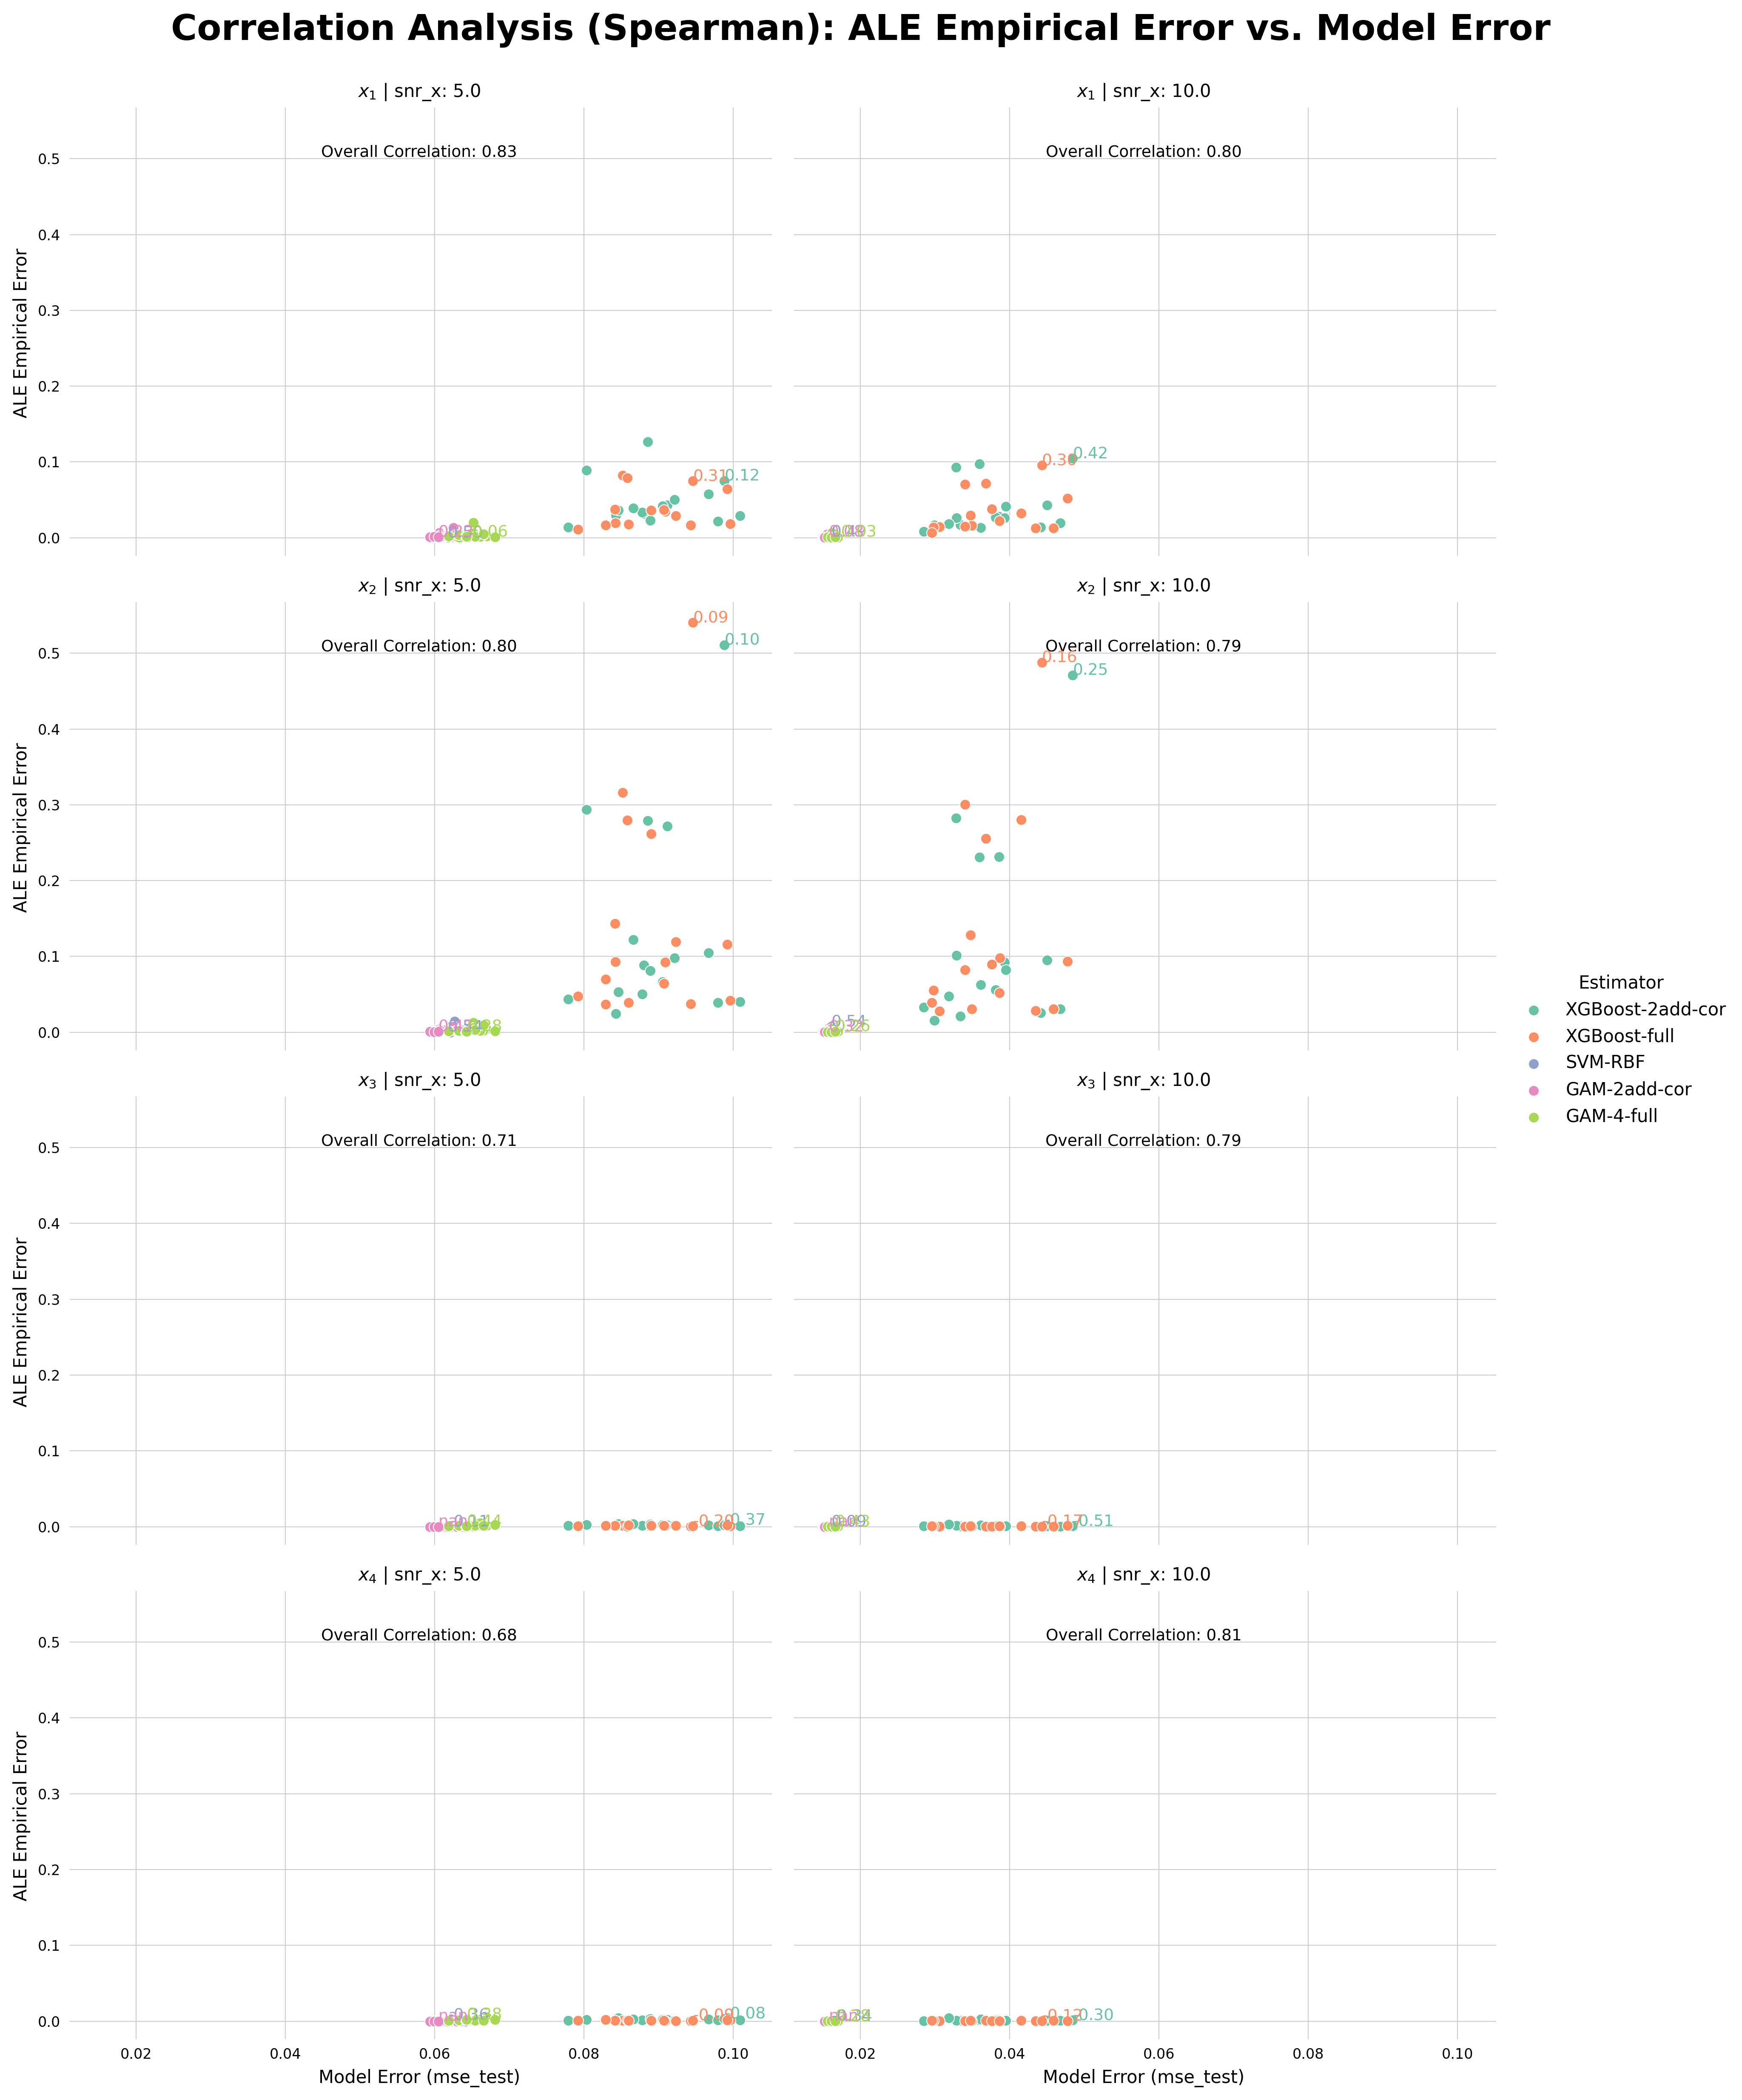

In [14]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="ALE Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [15]:
g;

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                        
x_1     5.0  Overall              0.826148
             XGBoost-2add-cor     0.123529
             XGBoost-full         0.311765
             SVM-RBF              0.503571
             GAM-2add-cor         0.232143
             GAM-4-full          -0.060714
        10.0 Overall              0.800750
             XGBoost-2add-cor     0.420588
             XGBoost-full         0.300000
             SVM-RBF              0.488235
             GAM-2add-cor         0.076471
             GAM-4-full          -0.032353
x_2     5.0  Overall              0.795073
             XGBoost-2add-cor     0.100000
             XGBoost-full         0.094118
             SVM-RBF              0.535714
             GAM-2add-cor         0.467857
             GAM-4-full           0.282143
        10.0 Overall              0.791889
             XGBoost-2add-cor     0.252941
             XGBoost-full         0.161765
             SVM-RBF              0.544118
             GAM-2add-cor         0.323529
             GAM-4-full           0.264706
x_3     5.0  Overall              0.705847
             XGBoost-2add-cor    -0.370588
             XGBoost-full        -0.202941
             SVM-RBF             -0.110714
             GAM-2add-cor              NaN
             GAM-4-full           0.442857
        10.0 Overall              0.789380
             XGBoost-2add-cor    -0.505882
             XGBoost-full        -0.173529
             SVM-RBF              0.091176
             GAM-2add-cor              NaN
             GAM-4-full           0.429412
x_4     5.0  Overall              0.684342
             XGBoost-2add-cor    -0.079412
             XGBoost-full        -0.091176
             SVM-RBF             -0.360714
             GAM-2add-cor              NaN
             GAM-4-full           0.282143
        10.0 Overall              0.811880
             XGBoost-2add-cor    -0.302941
             XGBoost-full        -0.117647
             SVM-RBF             -0.338235
             GAM-2add-cor              NaN
             GAM-4-full           0.276471